In [ ]:
!pip install git+https://github.com/jundongl/scikit-feature.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/jundongl/scikit-feature.git to /tmp/pip-req-build-r228k2jp
  Running command git clone -q https://github.com/jundongl/scikit-feature.git /tmp/pip-req-build-r228k2jp
  Created wheel for skfeature: filename=skfeature-1.0.0-py3-none-any.whl size=61509 sha256=8b84569ba944a348920f23b095dd230d243edc51a5ba586aeaca0b9f8a24f0ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-gyejvt2p/wheels/ea/ca/0b/ea331396461510ff572967528a880848ef75cc192b2f6074eb
Successfully built skfeature


In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.cluster.hierarchy as sch
import statistics

%matplotlib inline


In [ ]:
"""
We utilize the following code provided by https://wil.yegelwel.com/cluster-correlation-matrix/
to create sorted correlation matrix
"""
def cluster_corr(corr_array, inplace=False):
    """
    ## REFERENCE - https://wil.yegelwel.com/cluster-correlation-matrix/

    Rearranges the correlation matrix so that groups of highly
    correlated variables are next to eachother

    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix

    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold,
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)

    if not inplace:
        corr_array = corr_array.copy()

    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

In [ ]:
initial_data_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
# initial_data_red = initial_data_red.apply(pd.to_numeric)
columnsRed = initial_data_red.columns[:-1]
qualityRed = initial_data_red['quality']
initial_data_red.shape[0]

1599

In [ ]:
data_red_type = initial_data_red
# data_red_type.drop('quality', axis=1, inplace=True)
data_red_type['type'] = 0
data_red_type.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
statistics.variance(data_red_type['free sulfur dioxide'])

109.414883833059

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
###############################################################################################

In [ ]:
initial_data_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")



In [ ]:
data_white_type = initial_data_white
# data_white_type.drop('quality', axis=1, inplace=True)
data_white_type['type'] = 1
data_white_type.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [ ]:
data_white_type.shape[0]

4898

In [ ]:
data_white_type_sampled = data_white_type.sample(1599)
data_white_type_sampled.shape[0]
data_white_type_sampled.reset_index(drop=True, inplace=True)



mean red-> 0.6581488430268917  ; mean white-> 0.48769856160100067
mode red-> 0    0.6
dtype: float64  ; mode white-> 0    0.46
dtype: float64


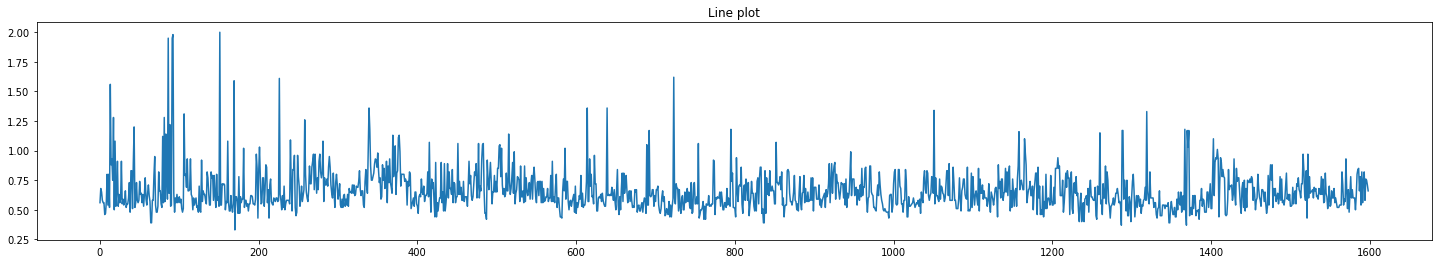

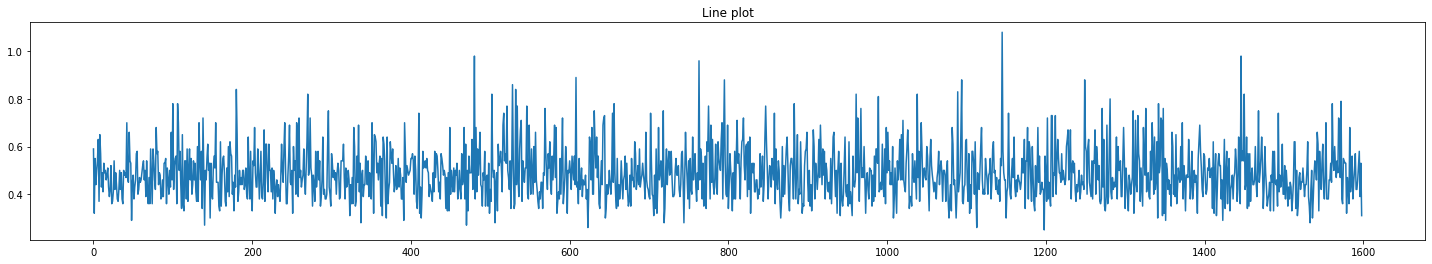

In [ ]:
print("mean red->", data_red_type['sulphates'].mean(), " ; mean white->", data_white_type_sampled['sulphates'].mean())
print("mode red->", data_red_type['sulphates'].mode(), " ; mode white->", data_white_type_sampled['sulphates'].mode())

figure(figsize=(25, 4))
data_red_type['sulphates'].plot(kind='line', title='Line plot')
figure(figsize=(25, 4))
data_white_type_sampled['sulphates'].plot(kind='line', title='Line plot')

In [ ]:
data_white_type_sampled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,8.1,0.20,0.30,1.3,0.036,7.0,49.0,0.99242,2.99,0.73,10.3,1
1,6.7,0.21,0.37,2.5,0.034,35.0,89.0,0.99130,3.25,0.50,11.0,1
2,7.0,0.15,0.34,1.4,0.039,21.0,177.0,0.99270,3.32,0.62,10.8,1
3,6.9,0.31,0.32,1.2,0.024,20.0,166.0,0.99208,3.05,0.54,9.8,1
4,6.5,0.32,0.23,8.5,0.051,20.0,138.0,0.99430,3.03,0.42,10.7,1


In [ ]:
type(data_white_type_sampled)

pandas.core.frame.DataFrame

In [ ]:
frames = [data_red_type, data_white_type]
wine_data = pd.concat(frames)

In [ ]:
wine_data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2261,6.5,0.360,0.31,4.1,0.061,20.0,134.0,0.99475,3.18,0.45,9.0,6,1
1363,6.9,0.320,0.16,1.4,0.051,15.0,96.0,0.99400,3.22,0.38,9.5,4,1
637,7.4,0.280,0.25,11.9,0.053,25.0,148.0,0.99760,3.10,0.62,9.2,5,1
4225,6.2,0.345,0.27,10.1,0.056,38.0,187.0,0.99486,3.31,0.56,10.6,5,1
2495,6.3,0.180,0.22,1.5,0.043,45.0,155.0,0.99238,3.19,0.48,10.2,5,1


In [ ]:
statistics.variance(data_red_type['alcohol'])

1.1356473950004737

Correlation matrix =>


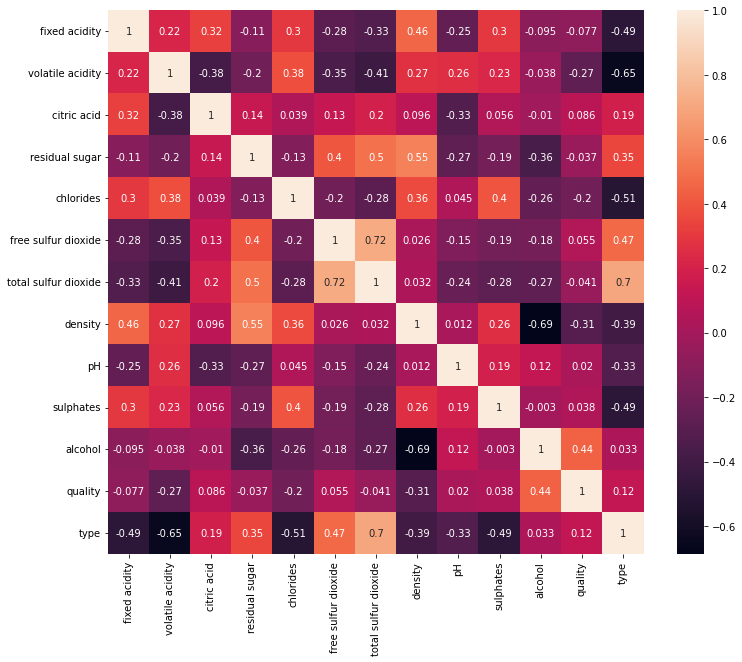

In [ ]:
print("Correlation matrix =>")
plt.figure(figsize=(12,10))
sns.heatmap(pd.DataFrame(wine_data).corr(), annot=True)

sorted Correlation matrix =>


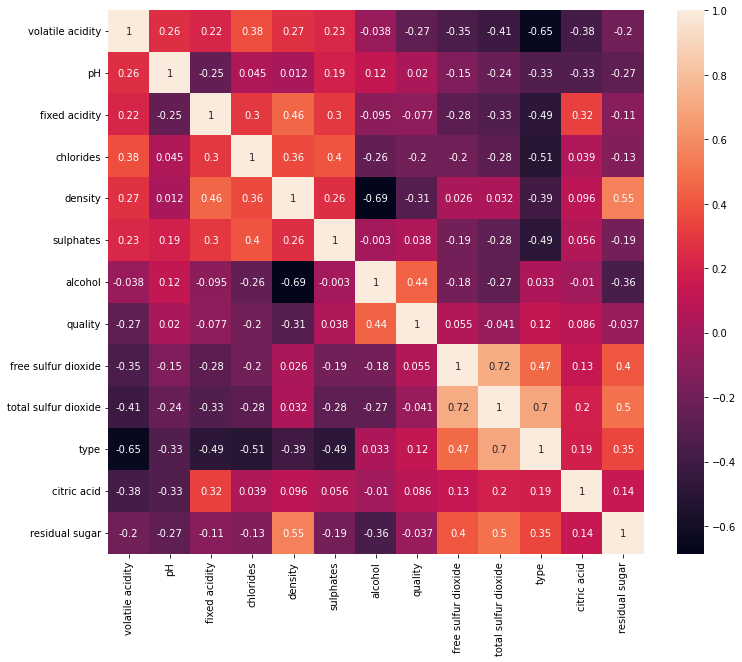

In [ ]:
print("sorted Correlation matrix =>")
plt.figure(figsize=(12,10))
sns.heatmap(cluster_corr(pd.DataFrame(wine_data).corr()), annot=True)
plt.show()

In [ ]:
wine_data.shape[0]

6497

In [ ]:
wine_type = wine_data['type']
# wine_data.drop(['type', 'alcohol', 'sulphates','pH', 'density'], axis=1, inplace=True)
wine_data.drop('type', axis=1, inplace=True)
# wine_worst = wine_data[['alcohol', 'sulphates','pH', 'density']]
columnsBest =  wine_data.columns


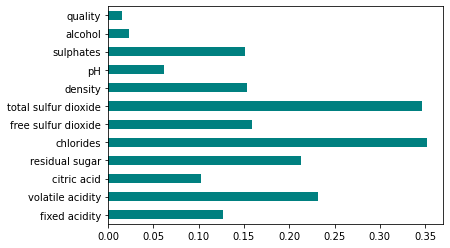

In [ ]:
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(wine_data,wine_type)
feat_importance = pd.Series(importance, columnsBest)
feat_importance.plot(kind='barh', color = 'teal')
plt.show()


In [ ]:
import statsmodels.api as sm
from scipy.stats.mstats import zscore

print(sm.OLS(zscore(wine_type), zscore(wine_data)).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   type   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                              3388.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                        0.00
Time:                        23:39:38   Log-Likelihood:                         -2774.8
No. Observations:                6497   AIC:                                      5574.
Df Residuals:                    6485   BIC:                                      5655.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
from skfeature.function.similarity_based import fisher_score

ranks = fisher_score.fisher_score(wine_data,wine_type)

feat_importance = pd.Series(ranks, columnsBest)
feat_importance.plot(kind='barh', color = 'teal')
plt.show()

/usr/local/lib/python3.8/dist-packages/skfeature/utility/construct_W.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  class_idx_all = (class_idx[:, np.newaxis] & class_idx[np.newaxis, :])


ValueError: ignored

In [ ]:
from sklearn.feature_selection import f_classif

f_score = f_classif(wine_data,wine_type)
# feat_importance = pd.Series(importance, columnsBest)
# feat_importance.plot(kind='barh', color = 'teal')
# plt.show()
f_score

p_values= pd.Series(f_score[1], index = wine_data.columns)
p_values.sort_values(ascending = True, inplace=True)
p_values

fixed acidity            0.000000e+00
volatile acidity         0.000000e+00
chlorides                0.000000e+00
free sulfur dioxide      0.000000e+00
total sulfur dioxide     0.000000e+00
sulphates                0.000000e+00
density                 7.319611e-236
residual sugar          2.959354e-185
pH                      5.923308e-164
citric acid              2.003736e-52
quality                  4.888069e-22
alcohol                  7.867874e-03
dtype: float64

In [ ]:
# from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import chi2


In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
wine_worst.head()

,alcohol,sulphates,pH,density
0,-0.915464,0.193097,1.813090,1.034993
1,-0.580068,0.999579,-0.115073,0.701486
2,-0.580068,0.797958,0.258120,0.768188
3,-0.580068,0.327510,-0.363868,1.101694
4,-0.915464,0.193097,1.813090,1.034993


In [ ]:
scaler = StandardScaler()
wine_data = pd.DataFrame( scaler.fit_transform(wine_data),columns=columnsBest)

In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(wine_data, wine_type, test_size=0.3,random_state=100)

In [ ]:
from sklearn.feature_selection import chi2

f_score = chi2(x_train,y_train)

p_values= pd.Series(f_score[1], index = x_train.columns)
p_values.sort_values(ascending = True, inplace=True)
p_values

ValueError: ignored

In [ ]:
from sklearn.svm import SVC
lin_svc = SVC()


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
forward_feature_selection = SequentialFeatureSelector(lin_svc).fit(x_train, y_train)

In [ ]:
forward_feature_selection.k_score_

0.925885951232486

In [ ]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.925886,0.004229,"[0.9230769230769231, 0.9252747252747253, 0.930...","(6,)","(total sulfur dioxide,)",0.00329,0.001645


In [ ]:
from sklearn.svm import SVC
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
y_pred = lin_svc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9297435897435897


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

model = LogisticRegression()
model.fit(x_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


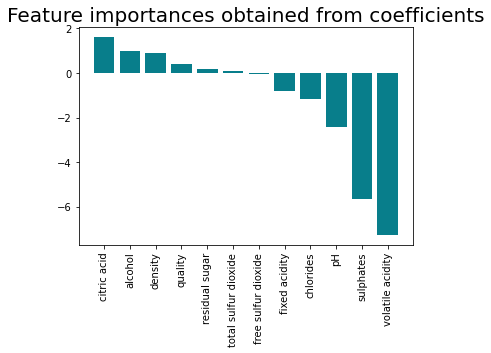

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

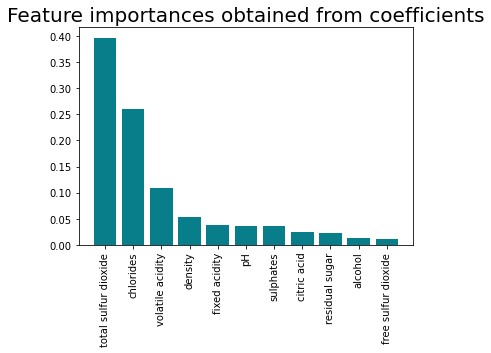

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
X_clf_new=SelectKBest(score_func=f_regression,k=4).fit_transform(x_train, y_train)


In [ ]:
X_clf_new[:4]

array([[ 0.52817634, -0.78765037,  0.0275796 ,  0.39377934],
       [-0.70607349, -0.78765037, -0.37206751,  0.02221304],
       [ 0.68245757, -0.48392759, -0.11515151,  0.74765201],
       [-0.47465165, -0.90913948, -0.34352129, -0.27857873]])

In [ ]:
x_train[:4]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
5397,0.528176,-0.787650,0.491146,-0.723758,0.027580,-0.536697,0.393779,-0.979386,-1.048055,-0.075731,0.342271
5111,-0.706073,-0.787650,-0.059414,-0.891916,-0.372068,-0.029599,0.022213,-1.039418,1.688692,0.999579,0.426120
3519,0.682458,-0.483928,0.078226,1.189036,-0.115152,1.238147,0.747652,0.968292,-1.172452,-0.277351,-0.244672
6105,-0.474652,-0.909139,-0.265874,-0.912936,-0.343521,0.421155,-0.278579,-1.432955,0.009325,1.066785,0.593818


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV


In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 55)),
              'weights': ['uniform', 'distance'],
              'metric': ['l1', 'l2', 'cosine']
             }

clf = GridSearchCV(knn, param_grid, cv = 10)

clf.fit(x_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
clf.best_params_

In [ ]:
newKnn = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='l1')
newKnn.fit(x_train, y_train)


In [ ]:
y_predTest = clf.predict(x_test)


In [ ]:
accuracy_score(y_test, y_predTest)


In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_predTest)


In [ ]:
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predTest)

plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predTest))